In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
import tensorflow as tf
print(tf.__version__)

2.17.1


In [92]:
df = pd.read_csv('/content/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [93]:
df.shape

(10000, 14)

In [94]:
X = df.iloc[:,3:13] # all rows and columns from 3 to 13
y = df.iloc[:,13]

In [95]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [96]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [97]:
# Feature engineering
from sklearn.preprocessing import OneHotEncoder

In [98]:
X['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [99]:
X.shape

(10000, 10)

In [100]:
# apply ohe to the categorical features
ohe = OneHotEncoder(sparse_output=False, drop = 'first')
ohe_df = ohe.fit_transform(X[['Geography','Gender']])

In [101]:
# convert ohe array back into dataframe
encoded_df = pd.DataFrame(ohe_df,
                          columns = ohe.get_feature_names_out(['Geography',
                                                               'Gender']))

In [102]:
X = pd.concat([X, encoded_df], axis=1) # concatenate X and ohe df
X.drop(['Geography', 'Gender'], axis=1, inplace=True) #  drop the original Categorical features from dataset
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0.0,0.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0.0,1.0,0.0
2,502,42,8,159660.80,3,1,0,113931.57,0.0,0.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,0.0,0.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,0.0,1.0,0.0


In [103]:
X['Geography_Germany'] = X['Geography_Germany'].astype(int)
X['Geography_Spain'] = X['Geography_Spain'].astype(int)
X['Gender_Male'] = X['Gender_Male'].astype(int)

In [104]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Geography_Germany  10000 non-null  int64  
 9   Geography_Spain    10000 non-null  int64  
 10  Gender_Male        10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


In [105]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [106]:
# splitting the dataset into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [107]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [108]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [109]:
X_train.shape, y_train.shape

((8000, 11), (8000,))

In [110]:
X_test.shape, y_test.shape

((2000, 11), (2000,))

In [167]:
# Create ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout

In [168]:
# Initializing ANN
classifier = Sequential()

In [169]:
# adding the input layer
# in dataset we have 11 inputs so in input i need to have 11 nodes/neurons/perceptron
classifier.add(Dense(units = 11, activation = 'relu', input_dim = 11))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [170]:
# adding first hidden layer
classifier.add(Dense(units = 7, activation = 'relu'))
# we can also add Dropout layer after every layer to reduce overfitting
classifier.add(Dropout(0.3))

In [171]:
# second hidden layer
classifier.add(Dense(units = 6, activation = 'relu'))
classifier.add(Dropout(0.3))

In [172]:
# third hidden layers
classifier.add(Dense(8, activation = 'relu'))
classifier.add(Dropout(0.3))

In [173]:
# fourth hidden layer
classifier.add(Dense(5, activation = 'relu'))
classifier.add(Dropout(0.3))

In [174]:
# adding output layer
classifier.add(Dense(1, activation = 'sigmoid'))

In [175]:
classifier.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                     │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 7)                   │              84 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 7)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 6)                   │              48 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 6)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 8)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 5)                   │              45 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 5)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [176]:
# if we want to initialize our own learning rate
import tensorflow
optimize = tensorflow.keras.optimizers.Adam(learning_rate = 0.01)

In [177]:
# training neural network
classifier.compile(optimizer = 'adam', # by default adam uses learning rate of 0.01
                   loss = 'binary_crossentropy',  # we have binary classification problem
                   metrics = ['accuracy'])

In [178]:
# Early stopping
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [179]:
# training model
model_history = classifier.fit(X_train, y_train,
                               validation_split = 0.33,
                               batch_size = 10,
                               epochs = 50,
                               callbacks = early_stopping)

Epoch 1/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.7049 - loss: 0.6497 - val_accuracy: 0.7955 - val_loss: 0.5125
Epoch 2/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7955 - loss: 0.5271 - val_accuracy: 0.7955 - val_loss: 0.4964
Epoch 3/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7974 - loss: 0.5135 - val_accuracy: 0.7955 - val_loss: 0.4758
Epoch 4/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7870 - loss: 0.5087 - val_accuracy: 0.7955 - val_loss: 0.4589
Epoch 5/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8028 - loss: 0.4756 - val_accuracy: 0.7959 - val_loss: 0.4451
Epoch 6/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8010 - loss: 0.4730 - val_accuracy: 0.7986 - val_loss: 0.4351
Epoch 7/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8084 - loss: 0.4517 - val_accuracy: 0.8054 - val_loss: 0.4237
Epoch 8/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8154 - loss: 0.4453 - val_accuracy: 0.

In [180]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [181]:
classifier.layers[0].get_weights() # weights and biases of first layer

[array([[-2.54589017e-03, -1.65074974e-01,  1.29383028e-01,
          2.92933762e-01, -8.38523284e-02,  1.08847432e-01,
          1.86696742e-02, -9.20346156e-02, -1.64613068e-01,
         -1.20080039e-02, -1.60835698e-01],
        [-3.02544773e-01,  2.98869640e-01,  1.20411307e-01,
          2.39842385e-01, -3.64869058e-01, -7.99880326e-01,
         -1.48942456e-01,  2.17968374e-01,  1.54189184e-01,
          4.11816686e-01, -8.15032184e-01],
        [-9.97022837e-02,  1.90107107e-01,  1.33654937e-01,
         -6.65669590e-02,  3.28940004e-01, -7.51483962e-02,
          9.14078131e-02,  4.31745313e-02, -8.79511386e-02,
          3.22420716e-01,  1.30772650e-01],
        [ 1.38987660e-01, -1.48351789e-01,  2.53490746e-01,
         -1.25928104e-01, -1.00031696e-01, -1.43797934e-01,
         -7.08117962e-01, -2.81126261e-01,  7.05617070e-01,
          1.46818966e-01,  2.06384495e-01],
        [ 3.86945039e-01, -2.42245495e-01,  9.82037604e-01,
          8.69294107e-02,  5.88832974e-01,  

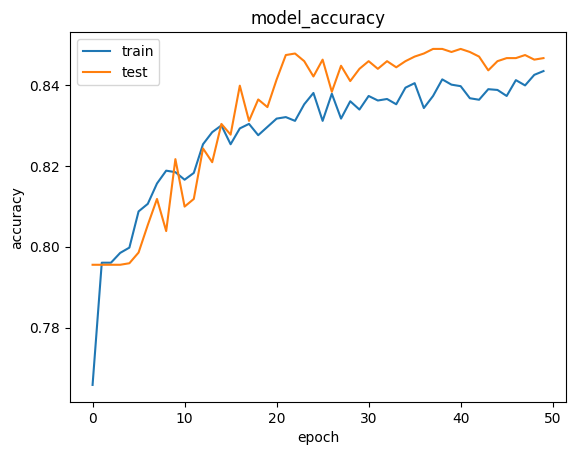

In [182]:
# summarize model history
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

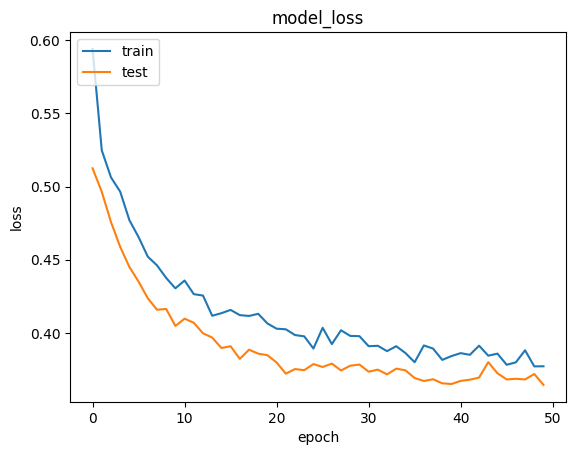

In [183]:
# summarize model history
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [184]:
# making predictions with the neural network
y_pred = classifier.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [185]:
y_pred # it is not 0 or 1 it is range of 0 to 1

array([[0.3215936 ],
       [0.31564838],
       [0.12026976],
       ...,
       [0.14750683],
       [0.118173  ],
       [0.11549251]], dtype=float32)

In [186]:
y_pred = np.where(y_pred >= 0.5, 1, 0) # replacing values greater than 0.5 by 1 and other by 0

In [187]:
y_pred # now it is 0 and 1

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [188]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1568,   27],
       [ 250,  155]])

In [189]:
# calculate accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test,y_pred))

0.8615
0.8516483516483516
0.38271604938271603


In [190]:
# get the weights of the neural network
classifier.get_weights()

[array([[-2.54589017e-03, -1.65074974e-01,  1.29383028e-01,
          2.92933762e-01, -8.38523284e-02,  1.08847432e-01,
          1.86696742e-02, -9.20346156e-02, -1.64613068e-01,
         -1.20080039e-02, -1.60835698e-01],
        [-3.02544773e-01,  2.98869640e-01,  1.20411307e-01,
          2.39842385e-01, -3.64869058e-01, -7.99880326e-01,
         -1.48942456e-01,  2.17968374e-01,  1.54189184e-01,
          4.11816686e-01, -8.15032184e-01],
        [-9.97022837e-02,  1.90107107e-01,  1.33654937e-01,
         -6.65669590e-02,  3.28940004e-01, -7.51483962e-02,
          9.14078131e-02,  4.31745313e-02, -8.79511386e-02,
          3.22420716e-01,  1.30772650e-01],
        [ 1.38987660e-01, -1.48351789e-01,  2.53490746e-01,
         -1.25928104e-01, -1.00031696e-01, -1.43797934e-01,
         -7.08117962e-01, -2.81126261e-01,  7.05617070e-01,
          1.46818966e-01,  2.06384495e-01],
        [ 3.86945039e-01, -2.42245495e-01,  9.82037604e-01,
          8.69294107e-02,  5.88832974e-01,  